In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
observations=pd.read_csv('observations.csv')
species=pd.read_csv('species_info.csv')

In [3]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [4]:
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [5]:
print(observations.describe(include='all'))

         scientific_name                            park_name  observations
count              23296                                23296  23296.000000
unique              5541                                    4           NaN
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN
freq                  12                                 5824           NaN
mean                 NaN                                  NaN    142.287904
std                  NaN                                  NaN     69.890532
min                  NaN                                  NaN      9.000000
25%                  NaN                                  NaN     86.000000
50%                  NaN                                  NaN    124.000000
75%                  NaN                                  NaN    195.000000
max                  NaN                                  NaN    321.000000


In [6]:
observations=observations.drop_duplicates()

In [7]:
print(observations.describe(include='all'))

          scientific_name            park_name  observations
count               23281                23281  23281.000000
unique               5541                    4           NaN
top     Castor canadensis  Bryce National Park           NaN
freq                   12                 5823           NaN
mean                  NaN                  NaN    142.280357
std                   NaN                  NaN     69.885439
min                   NaN                  NaN      9.000000
25%                   NaN                  NaN     86.000000
50%                   NaN                  NaN    124.000000
75%                   NaN                  NaN    195.000000
max                   NaN                  NaN    321.000000


In [8]:
park_observation=observations.groupby('park_name').observations.sum().reset_index()

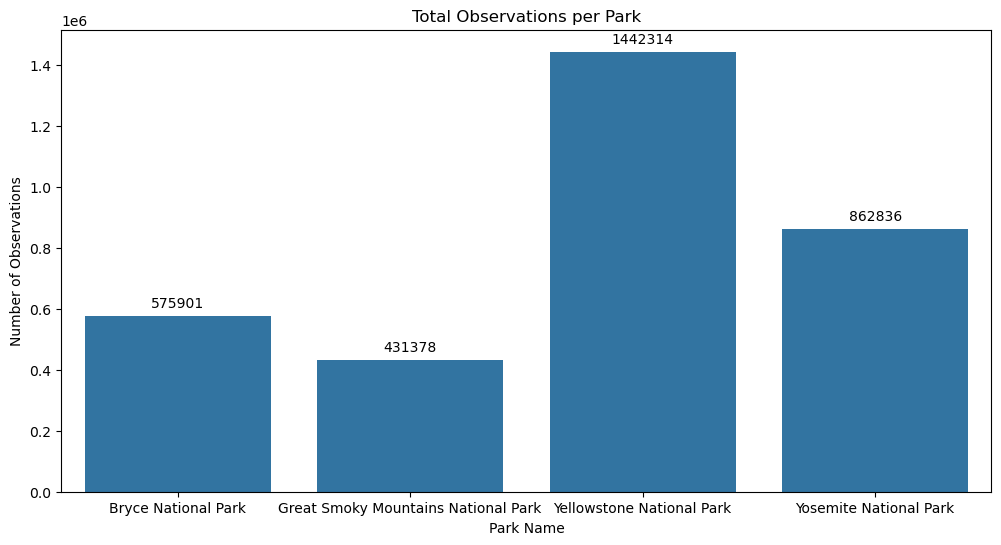

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(12,6))
bar_plot=sns.barplot(x='park_name', y='observations', data=park_observation, order=park_observation.park_name)
for p in bar_plot.patches: 
    bar_plot.annotate(round(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Total Observations per Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.show()
plt.savefig('Observations per Park.png')

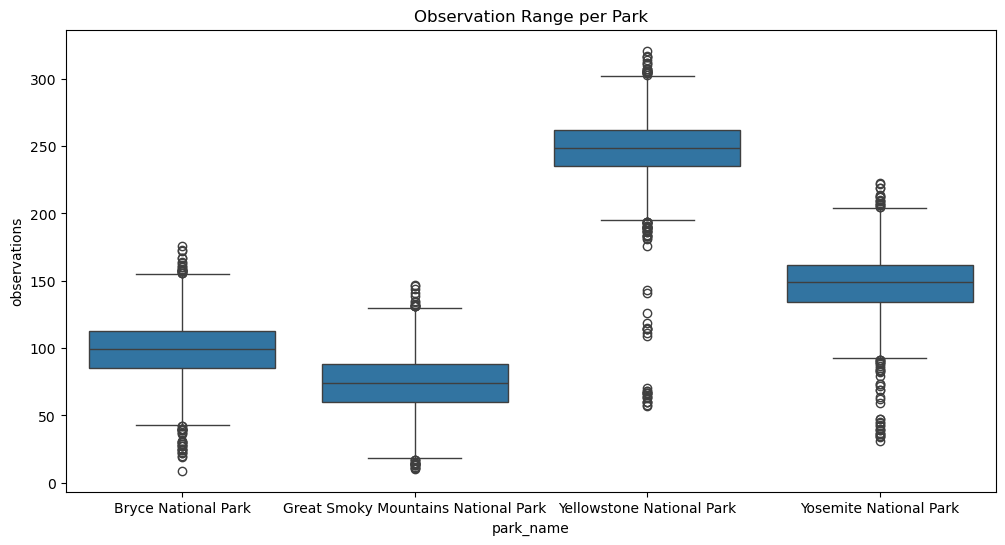

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='park_name', y='observations', data=observations, order=park_observation.park_name)
plt.title('Observation Range per Park')
plt.show()
plt.savefig('Observation Range per Park.png')
plt.close('all')

In [11]:
print(species.describe(include='all'))

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


In [12]:
species=species.drop_duplicates(subset=['scientific_name'])
print(species.describe(include='all'))

              category                scientific_name        common_names  \
count             5541                           5541                5541   
unique               7                           5541                5229   
top     Vascular Plant  Clethrionomys gapperi gapperi  Brachythecium Moss   
freq              4262                              1                   7   

       conservation_status  
count                  178  
unique                   4  
top     Species of Concern  
freq                   151  


In [13]:
updated_species=species.groupby('conservation_status').category.value_counts().reset_index()
print(updated_species)

   conservation_status           category  count
0           Endangered             Mammal      6
1           Endangered               Bird      4
2           Endangered               Fish      3
3           Endangered          Amphibian      1
4           Endangered     Vascular Plant      1
5          In Recovery               Bird      3
6   Species of Concern               Bird     68
7   Species of Concern     Vascular Plant     43
8   Species of Concern             Mammal     22
9   Species of Concern  Nonvascular Plant      5
10  Species of Concern            Reptile      5
11  Species of Concern          Amphibian      4
12  Species of Concern               Fish      4
13          Threatened               Fish      3
14          Threatened          Amphibian      2
15          Threatened             Mammal      2
16          Threatened     Vascular Plant      2


In [14]:
species_pivot=updated_species.pivot(columns='category', index='conservation_status', values='count')

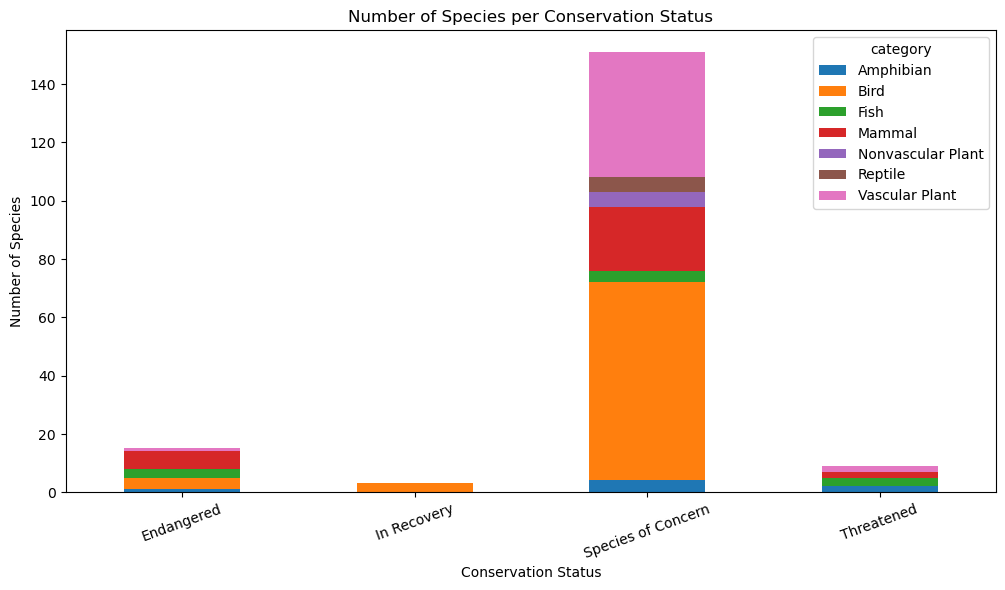

<Figure size 640x480 with 0 Axes>

In [15]:
species_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel('Number of Species')
plt.xticks(rotation=20)
plt.title('Number of Species per Conservation Status')
plt.xlabel('Conservation Status')
plt.show()
plt.savefig('Number of Species per Conservation Status.jpg')

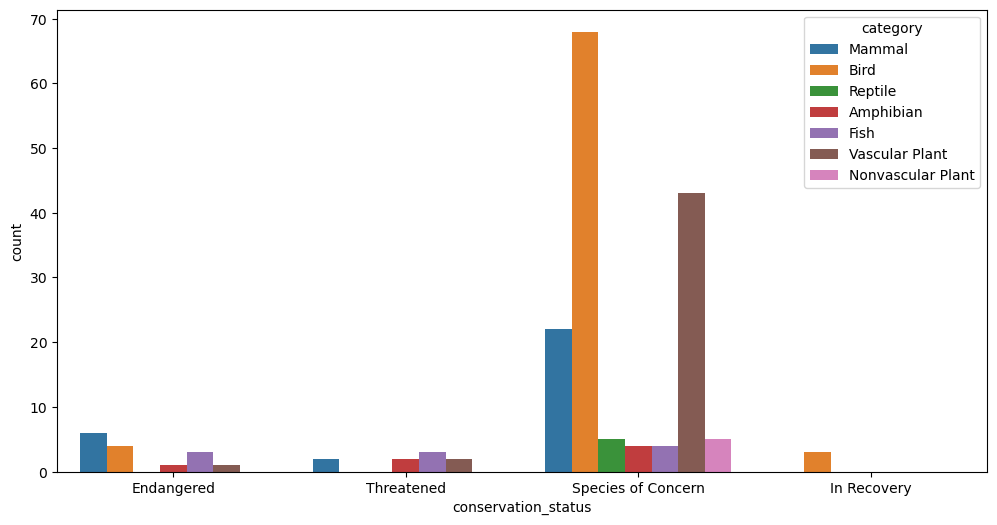

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x=species.conservation_status, hue=species.category, order=['Endangered','Threatened','Species of Concern','In Recovery'])
plt.show()

In [17]:
updated_observation=pd.merge(observations, species, how='left')

In [18]:
print(updated_observation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23281 entries, 0 to 23280
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      23281 non-null  object
 1   park_name            23281 non-null  object
 2   observations         23281 non-null  int64 
 3   category             23281 non-null  object
 4   common_names         23281 non-null  object
 5   conservation_status  760 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB
None


In [19]:
print(updated_observation.describe(include='all'))

          scientific_name            park_name  observations        category  \
count               23281                23281  23281.000000           23281   
unique               5541                    4           NaN               7   
top     Castor canadensis  Bryce National Park           NaN  Vascular Plant   
freq                   12                 5823           NaN           17867   
mean                  NaN                  NaN    142.280357             NaN   
std                   NaN                  NaN     69.885439             NaN   
min                   NaN                  NaN      9.000000             NaN   
25%                   NaN                  NaN     86.000000             NaN   
50%                   NaN                  NaN    124.000000             NaN   
75%                   NaN                  NaN    195.000000             NaN   
max                   NaN                  NaN    321.000000             NaN   

         common_names conservation_stat

In [20]:
updated_observation=updated_observation.drop_duplicates()

In [21]:
observe_cat = updated_observation.groupby(['park_name','conservation_status','category']).observations.sum().reset_index()

In [22]:
print(observe_cat)

                 park_name conservation_status        category  observations
0      Bryce National Park          Endangered       Amphibian            31
1      Bryce National Park          Endangered            Bird            98
2      Bryce National Park          Endangered            Fish            70
3      Bryce National Park          Endangered          Mammal           265
4      Bryce National Park          Endangered  Vascular Plant            25
..                     ...                 ...             ...           ...
63  Yosemite National Park  Species of Concern  Vascular Plant          5794
64  Yosemite National Park          Threatened       Amphibian           156
65  Yosemite National Park          Threatened            Fish           226
66  Yosemite National Park          Threatened          Mammal           146
67  Yosemite National Park          Threatened  Vascular Plant           144

[68 rows x 4 columns]


In [23]:
print(observe_cat.describe(include='all'))

                  park_name conservation_status   category  observations
count                    68                  68         68     68.000000
unique                    4                   4          7           NaN
top     Bryce National Park  Species of Concern  Amphibian           NaN
freq                     17                  28         12           NaN
mean                    NaN                 NaN        NaN   1313.161765
std                     NaN                 NaN        NaN   2767.218845
min                     NaN                 NaN        NaN     11.000000
25%                     NaN                 NaN        NaN     98.750000
50%                     NaN                 NaN        NaN    258.000000
75%                     NaN                 NaN        NaN    678.750000
max                     NaN                 NaN        NaN  15986.000000


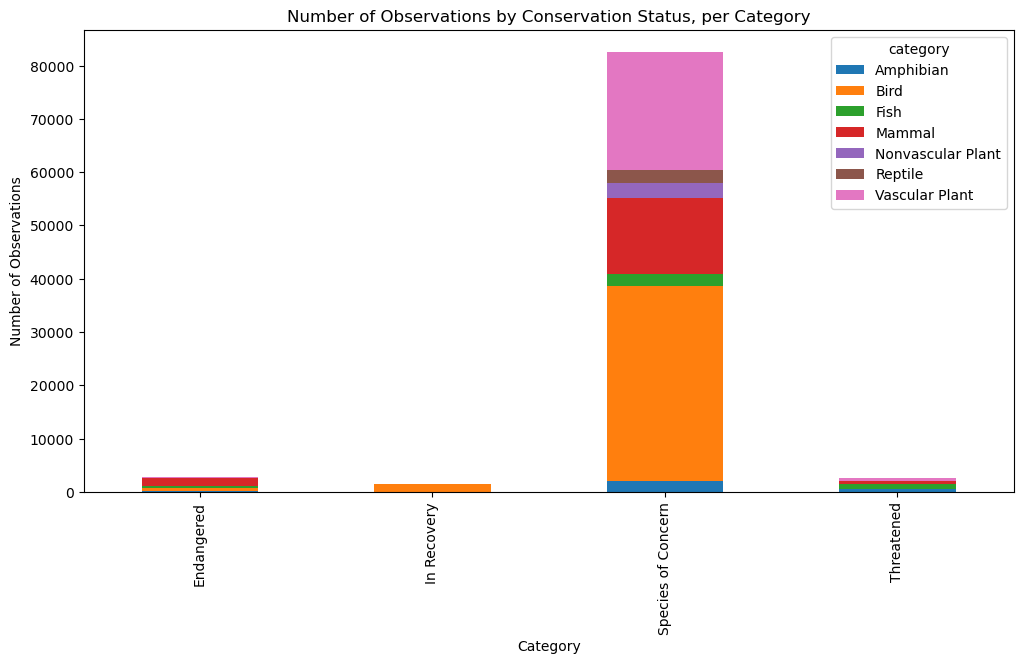

<Figure size 640x480 with 0 Axes>

In [24]:
category_pivot=observe_cat.pivot_table(columns='category', index='conservation_status', values='observations', aggfunc='sum')
plt.close('all')
category_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Number of Observations by Conservation Status, per Category')
plt.xlabel('Category')
plt.ylabel('Number of Observations')
plt.show()
plt.savefig('Number of Observations by Conservation Status, per Category.jpg')

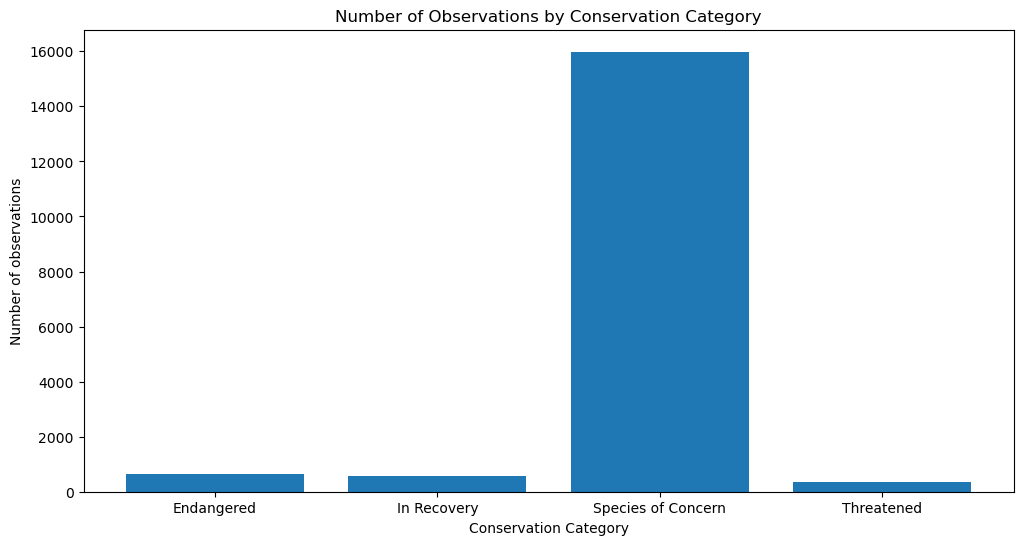

In [25]:
plt.close('all')
plt.figure(figsize=(12,6))
plt.bar('conservation_status','observations', data=observe_cat)
plt.title('Number of Observations by Conservation Category')
plt.xlabel('Conservation Category')
plt.ylabel('Number of observations')
plt.show()

C:\Users\bichn\AppData\Local\Temp\ipykernel_13900\1105359958.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='conservation_status',y='observations', hue='park_name', data=observe_cat, ci=None)


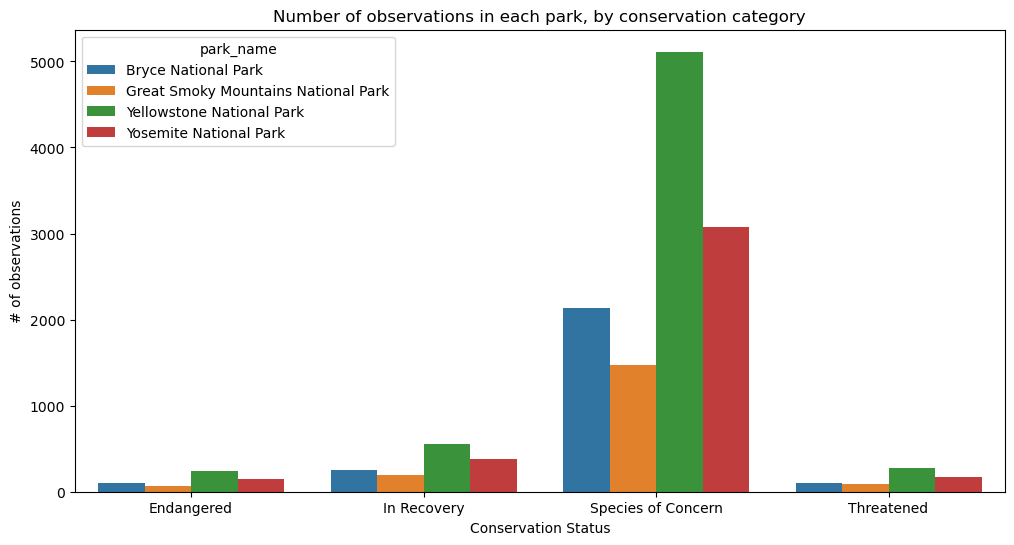

In [26]:
plt.close('all')
plt.figure(figsize=(12,6))
sns.barplot(x='conservation_status',y='observations', hue='park_name', data=observe_cat, ci=None)
plt.title('Number of observations in each park, by conservation category')
plt.xlabel('Conservation Status')
plt.ylabel('# of observations')
plt.show()

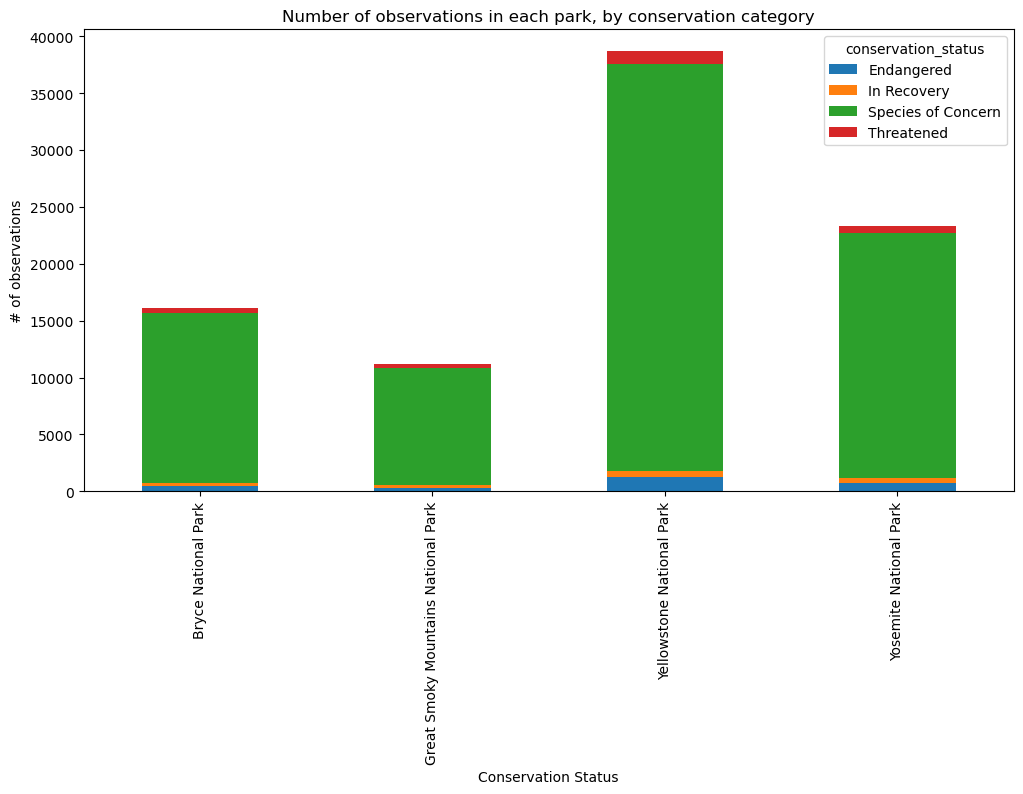

<Figure size 640x480 with 0 Axes>

In [27]:
observe_park_pivot=observe_cat.pivot_table(index='park_name', columns='conservation_status', values='observations', aggfunc='sum')
plt.close('all')
observe_park_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Number of observations in each park, by conservation category')
plt.xlabel('Conservation Status')
plt.ylabel('# of observations')
plt.show()
plt.savefig('Number of observations in each park, by conservation category.png')

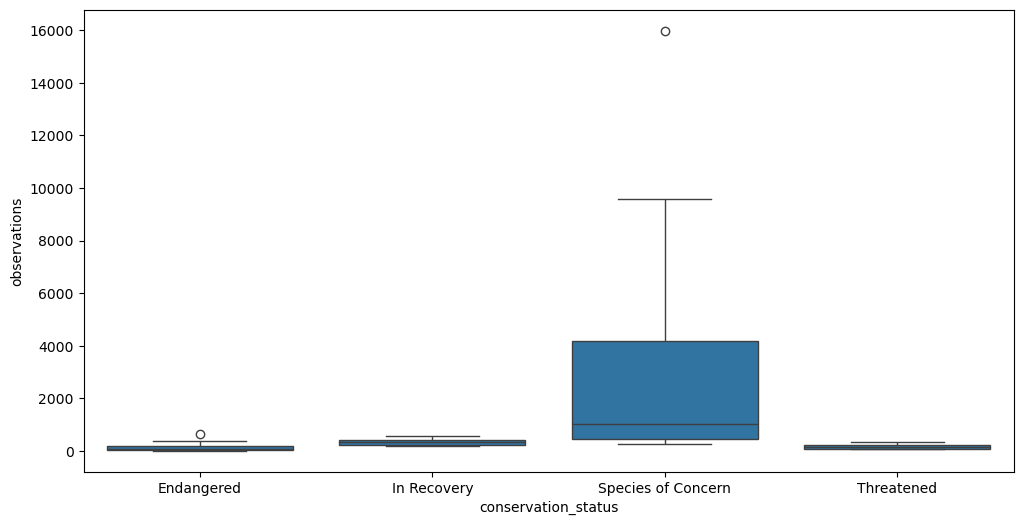

In [28]:
plt.close('all')
plt.figure(figsize=(12,6))
sns.boxplot(x='conservation_status',y='observations', data=observe_cat[observe_cat.conservation_status.isin(['Endangered','In Recovery','Species of Concern','Threatened'])])
plt.show()

In [29]:
updated_observation = updated_observation.fillna('Not in danger')